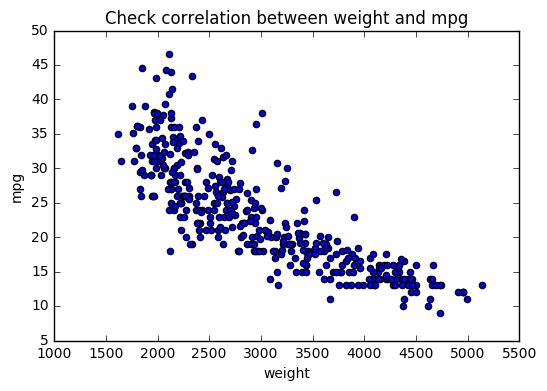

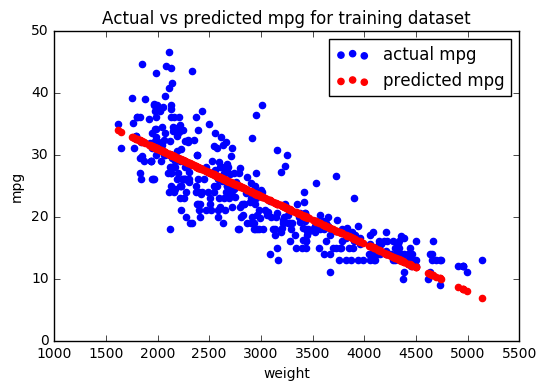

Root mean Squared error is  4.32164512627


In [49]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import re

#obtain CMU compiled data on vehicle fuel efficiencies hosted by the University of California Irvine on their machine learning repository
response=requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data')
content=response.content
parser=BeautifulSoup(content,'html.parser')
table_string=parser.string
#Data is space delimited, and the last column - 'car name' is delimited with '"', the regex below splits each row on space, except when it encounters the " delimiter
pat = re.compile(r'''((?:[^( )+"']|"[^"]*"|'[^']*')+)''')
#The scraped data is split into a list of lists which is then loaded on to a dataframe for processing
list_of_list=[]

#Each row is split by a new line character
for row in table_string.split('\n'):
    row_list=pat.split(row)
    row_list=[x.strip(' ') for x in row_list] #gets rid of the additional white spaces
    row_list=list(filter(None,row_list)) # deletes all '' elements of the row list to leave behind column data
    list_of_list.append(row_list)

#Load list_of_list to dataframe. You will notice that the last 2 columns ('origin' and 'car_name' are in a single column)
#this is because they are seperated by a tab space. We split this composite column into 2 seperate columns later 
auto_mpg=pd.DataFrame(list_of_list,columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin_and_car_name'])
auto_mpg['origin']=auto_mpg['origin_and_car_name'].str.split('\t').str[0]
auto_mpg['car_name']=auto_mpg['origin_and_car_name'].str.split('\t').str[1]
auto_mpg.drop('origin_and_car_name',inplace=True,axis=1) # drop composite column as it has now been split
auto_mpg=auto_mpg[auto_mpg['horsepower']!='?'] # missing horsepower data is removed

#Convert necessary columns into numeric datatype
for column in auto_mpg.columns:
    if(column !='car_name' and column !='model_year' and column!='origin'):
        auto_mpg[column]=pd.to_numeric(auto_mpg[column])

#auto_mpg dataframe has an additional row at the end composed on NULL's
auto_mpg.dropna(axis=0,inplace=True)

auto_mpg.plot(x='weight',y='mpg',kind='scatter',title='Check correlation between weight and mpg')
plt.show()
# strong negative correlation between weight and mpg

lr=LinearRegression()
lr.fit(auto_mpg[['weight']],auto_mpg['mpg'])
predictions=lr.predict(auto_mpg[['weight']])

actual_mpg=plt.scatter(x=auto_mpg['weight'],y=auto_mpg['mpg'],color='blue')
predicted_mpg=plt.scatter(x=auto_mpg['weight'],y=predictions,color='red')
plt.title('Actual vs predicted mpg for training dataset')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend((actual_mpg,predicted_mpg),('actual mpg','predicted mpg'))
plt.show()

mse=mean_squared_error(auto_mpg['mpg'],predictions)
rmse=np.sqrt(mse)
print('Root mean Squared error is ', rmse)
